## Fons van der Plas - Numerical Methods Assignment 3 

_Note: using Jupyter's 'Run All' skipped some blocks on my system, so please run each code block individually._

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

%config InlineBackend.figure_format = 'retina'

# 1. Polynomial roots

**a):** Applying Newton's method

In [3]:
def find_root_newton(func, funcderiv, t_zero, tolerance=1e-12, max_iter=100, verbose=True, deriv_tolerance=1e-9):
    """
    Apply Newton's method to the given function.
    
    Parameters
    ----------
    
    func
        Function to apply the algorithm to
    
    funcderiv
        Exact derivative of the function
    
    t_zero : float
        Initial value
    
    tolerance : float
        Tolerance for the absolute value of `func`
    
    max_iter : int
        Maximum number of iterations
    
    verbose : bool
        Print progress at each iteration?
    
    deriv_tolerance : float
        This method will raise a Warning when the absolute value of `funcderiv` is smaller than `deriv_tolerance`, to warn about a possible poor result
    
    Returns
    -------
    float
        The found root
    
    bool
        A boolean indicating whether the algorithm converged
    """
    iteration = 0
    t = t_zero
    
    # We increase efficiency by only evaluating `funct(t)` once per iteration:
    funct = func(t)
    
    while abs(funct) > tolerance and iteration < max_iter:
        # We evaluate the derivative seperately, to check that it is non-zero:
        deriv = funcderiv(t)
        if abs(deriv) < deriv_tolerance:
            if verbose:
                print("Derivative is close to zero; algorithm terminating...")
            return np.nan, False
        if verbose:
            print(f"k={iteration}, t_k={t}, |f(t_k)|={abs(funct)}")
        
        t = t - funct/deriv
        iteration += 1
        
        funct = func(t)
    return t, iteration!=max_iter

--------
**b):** We wish to find the three roots of:
$$P: t \mapsto t^3 - 9t^2 + 15t - 1$$
which has derivative:
$$P': t \mapsto 3t^2 - 18t + 15.$$


In [4]:
P = lambda t: t*t*t - 9*t*t + 15*t - 1
Pderiv = lambda t: 3*t*t - 18*t + 15

# Example execution:
find_root_newton(P, Pderiv, 0)

k=0, t_k=0, |f(t_k)|=1
k=1, t_k=0.06666666666666667, |f(t_k)|=0.039703703703703686
k=2, t_k=0.06954096954096954, |f(t_k)|=7.267848332670468e-05
k=3, t_k=0.06954625034427293, |f(t_k)|=2.4516422225673296e-10


(0.06954625036208663, True)

We know that there exist 3 distinct roots. Hoping that all of them lie in the interval [-10,10], we can try different initial values in that interval.

The following steps are written as methods, so that we can use them again later.

In [5]:
def find_many_roots(func, funcderiv, initial_values):
    """
    Apply Newton's method to each initial value in a list, and return the points of convergence.
    """
    found_roots = set()
    for t_zero in initial_values:
        root, converged = find_root_newton(func, funcderiv, t_zero, verbose=False)
        if converged:
            found_roots.add(root)
    return found_roots

initial_values = np.linspace(-10,10,num=50)
found_roots = find_many_roots(P, Pderiv, initial_values)
found_roots

{0.06954625036201764,
 0.06954625036206347,
 0.06954625036208029,
 0.06954625036208116,
 0.06954625036208621,
 0.06954625036208624,
 0.06954625036208642,
 0.06954625036208659,
 0.0695462503620866,
 0.06954625036208661,
 0.06954625036208663,
 0.06954625036208664,
 2.107403595621632,
 2.1074035956216326,
 2.107403595621633,
 2.107403595621634,
 2.107403595621645,
 6.823050154016278,
 6.823050154016279,
 6.82305015401628,
 6.823050154016281,
 6.823050154016282,
 6.823050154016283,
 6.823050154016286}

Clearly, we found three distinct roots. We can pick three roots manually, or we can group them by some tolerance:

In [6]:
def group_by_tolerance(values, grouping_tol):
    """
    Split the given list into a low number of groups, 
    such that the difference between any two numbers within a group is lower than `grouping_tol`.
    """
    groups = list()

    for root in values:
        found_a_group = False
        for group in groups:
            # If the root is close to the first element of the group:
            # (We divide `grouping_tol` by two because of the triangle inequality)
            if abs(root - group[0]) < grouping_tol/2:
                # Add it to the group and continue
                group.append(root)
                found_a_group = True
                break
        # If no suitable group was found:
        if not found_a_group:
            # Create a new group
            groups.append([root])
    return groups

grouping_tol = 1e-2
groups = group_by_tolerance(found_roots, grouping_tol)
print(groups)

[[0.06954625036208661, 0.06954625036208029, 0.06954625036206347, 0.06954625036208663, 0.06954625036208624, 0.06954625036208664, 0.06954625036201764, 0.06954625036208659, 0.06954625036208642, 0.06954625036208621, 0.0695462503620866, 0.06954625036208116], [2.1074035956216326, 2.107403595621633, 2.107403595621634, 2.107403595621645, 2.107403595621632], [6.823050154016281, 6.823050154016283, 6.823050154016279, 6.823050154016278, 6.82305015401628, 6.823050154016282, 6.823050154016286]]


and take the average:

In [7]:
omegas = sorted([np.mean(group) for group in groups])

for i,omega in enumerate(omegas):
    print(f"omega_{i} = {omega}")

omega_0 = 0.06954625036207787
omega_1 = 2.1074035956216353
omega_2 = 6.823050154016281


-------
**c):** Finding critical points (max, min) corresponds to finding roots of the the derivative (since $P$ is $C^{\infty}$).
$$P'': t \mapsto 6t - 18$$

In [8]:
Pderivderiv = lambda t: 6*t - 18

Let's apply the same methods as before to find three roots of $P'$.

In [9]:
found_roots = find_many_roots(Pderiv, Pderivderiv, np.linspace(-10,10,num=50))
groups = group_by_tolerance(found_roots, 1e-2)
unique_roots = [np.mean(group) for group in groups]

# We sort the roots by their image of P, to find which one is the max, and which is the min.
#(This works for a polynomial of degree 3, but not in general.)
unique_roots = sorted(unique_roots, key=P)

b,a = unique_roots

print(f"a={a};\t P(a)={P(a)}")
print(f"b={b};\t P(b)={P(b)}")

a=0.9999999999999937;	 P(a)=6.000000000000001
b=5.000000000000003;	 P(b)=-25.99999999999997


As expected, we find 2 unique roots ($P'$ is a parabola), corresponding to the local max and min. To find the inflection point, we need to solve $P''(t)=6t-18=0$. We could solve this numerically, but the problem is solved easily analytically:

In [10]:
c = 18/6
print(f"c={c};\t P(c)={P(c)}")

c=3.0;	 P(c)=-10.0


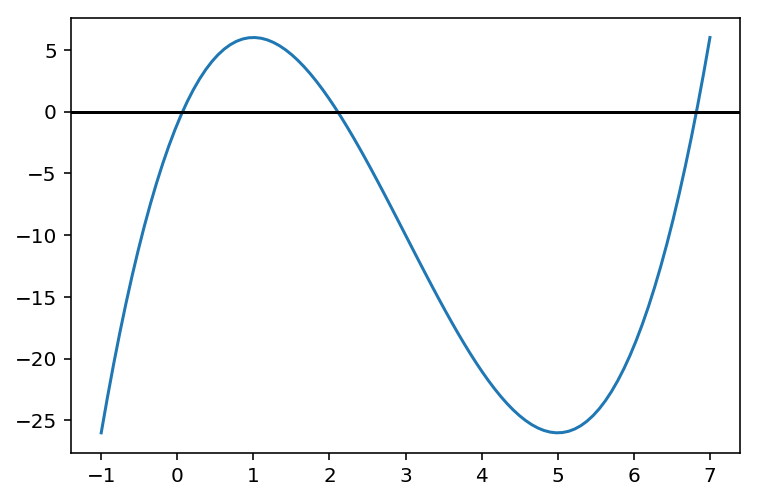

In [11]:
x = np.linspace(-1,7,num=100)
y = P(x)

plt.plot(x,y)
plt.axhline(0,c="black")

----------
**d):** I assume $f=P$. We find:
$$g: t \mapsto t - \frac{f(t)}{f'(t)} = t - \frac{t^3 - 9t^2 + 15t - 1}{3t^2 - 18t + 15}$$
and
$$g': t \mapsto 1 - \frac{f'(t)^2 - f(t)f''(t)}{f'(t)^2} = \frac{f(t)f''(t)}{f'(t)^2}$$
and
$$g'': t \mapsto \frac{(f(t)f'''(t)+f'(t)f''(t))f'(t)^2 - f(t)f''(t)(2f'(t)f''(t))}{f'(t)^4}$$

In [12]:
g = lambda t: t - P(t)/Pderiv(t)
gderiv = lambda t: (P(t)*Pderivderiv(t))/(Pderiv(t)**2)

P = P
Pd = Pderiv
Pdd = Pderivderiv
Pddd = lambda t: 6

gderivderiv = lambda t: ((P(t)*Pddd(t) + Pd(t)*Pdd(t) )*(Pd(t)**2) - P(t)*Pdd(t)*(2*Pd(t)*Pdd(t)))/(Pd(t)**4)

Before we continue, let's plot $g$ and $t \mapsto t$:

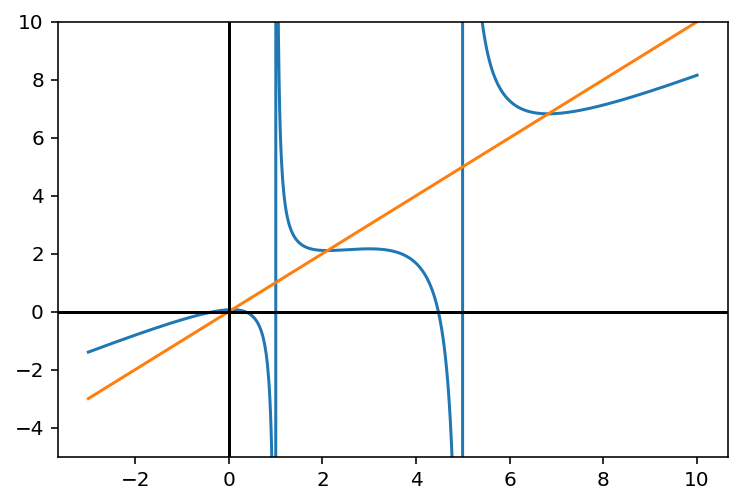

In [13]:
x = np.linspace(-3,10,num=1000)

plt.plot(x,g(x),x,x)
plt.ylim(-5,10)
plt.axhline(0,c="black")
plt.axvline(0,c="black")
plt.show()

**Extreme values** of $g$: find roots of $g'$

In [14]:
found_roots = find_many_roots(gderiv, gderivderiv, np.linspace(-2,10,num=50))
groups = group_by_tolerance(found_roots, 1e-2)
unique_roots = [np.mean(group) for group in groups]

unique_roots

[0.06954625036219757, 2.107403595621629, 3.00000000000028, 6.823050154016205]

In [15]:
def classify_extreme(extreme_val, funcderivderiv, dd_tolerance=1e-3):
    funcdd = funcderivderiv(extreme_val)
    if abs(funcdd) < dd_tolerance:
        return "saddle"
    return "local max" if funcdd < 0 else "local min"

for root in unique_roots:
    print(f"{classify_extreme(root, gderivderiv)} at {root}")

local max at 0.06954625036219757
local min at 2.107403595621629
local max at 3.00000000000028
local min at 6.823050154016205


**Vertical asymptotes**: evaluate `g` at regular intervals, and find large 'jumps' in values:

In [16]:
x = np.linspace(0,6,num=100)
jumps = np.diff(g(x))

jump_tolerance = 10
midpoints = (x[:-1] + x[1:])/2
large_jumps_at = midpoints[np.abs(jumps) > jump_tolerance]

vertical_asymptotes_at = [np.mean(group) for group in group_by_tolerance(large_jumps_at, 1e0)]
print("Vertical asymptotes found at",vertical_asymptotes_at)

Vertical asymptotes found at [1.0, 5.0]


**Scewed asymptotes**: first derive the slope of such an asymptote by estimating $\lim_{t\rightarrow\infty} \frac{g(t)}{t}$:

In [17]:
almost_infinity = 1e50

slope = g(almost_infinity)/almost_infinity
slope

0.6666666666666666

Next, find the intersections of the asymptotes with the y-axis, by taking a more modest `infinity`:

In [18]:
modest_infinity = 1e10
rightasymptote_intersection = g( modest_infinity) - slope*modest_infinity
leftasymptote_intersection  = g(-modest_infinity) + slope*modest_infinity

leftasymptote_intersection, rightasymptote_intersection


(1.0, 1.0000009536743164)

It seems that there is just a single scewed asymptote:
$$t \mapsto \texttt{rightasymptote_intersection} + \texttt{slope} \cdot t$$

**Fixed points**: Apply Newton's algorithm to $t \mapsto g(t) - t$, with derivative $t \mapsto g'(t) - 1$.

In [19]:
found_roots = find_many_roots(lambda t: g(t)-t, lambda t: gderiv(t)-1, np.linspace(-2,10,num=50))
groups = group_by_tolerance(found_roots, 1e-2)
fixed_points = [np.mean(group) for group in groups]
fixed_points

[0.06954625036218892, 2.1074035956216264, 6.82305015401621]

----------
**e):** From the graph of $P$, we can see that:

* $P$ is _concave_ on the interval $I_1$ and _increasing_. For each $k$, there are three possibilities:
 * $t_k = \omega_1$: done.
 * $t_k < \omega_1$: in this case, $t_k<t_{k+1}$, but it will not _overshoot_ (i.e. $t_{k}<t_{k+1}<\omega_1$), since $P$ is concave on the interval. The algorithm will move closer to $\omega_1$.
 * $t_k > \omega_1$: in this case, the algorithm will overshoot, and $t_{k+1}$ will land to left of $\omega_1$ (i.e. $t_{k+1} < \omega_1 < t_k$). This means that all successive values of $t_k$ will fit in the second possibility, which converges to $\omega_1$.

Similar arguments hold for convergence to $\omega_3$ on $I_3$.

-------------
**f):** We already know that $\omega_2$ converges to $\omega_2$, as it is a root.

Let's iteratively expand $I_2=[\omega_2^-, \omega_2^+]$ until a different root is found. We will then conclude naively that $I_2=[\min T_2, \max T_2]$ is the maximum interval.

In [20]:
omega2 = omegas[1]

omega2left = omega2
omega2right = omega2

stepsize = 1e-4

roottolerance = 1e-2
while abs(omega2 - find_root_newton(P, Pderiv, t_zero=omega2left, verbose=False)[0]) < roottolerance:
    omega2left -= stepsize
while abs(omega2 - find_root_newton(P, Pderiv, t_zero=omega2right, verbose=False)[0]) < roottolerance:
    omega2right += stepsize

# Note that if there is no convergence, `find_root_newton` either
#    returns np.nan (`np.nan < roottolerance` is false), or
#    t_100, which is most likely far away from omega_2
    
print(f"I_2 ~= [{omega2left}, {omega2right}]")

I_2 ~= [1.1657035956215005, 4.228503595625097]


If $\omega_2^- < t_k < \omega_2^+$, then $t_{k+1}$ will remain in that interval, and $\omega_2^-, \omega_2^+$ are the smallest and largest (resp.) values for which this is true. This means that:
$$g((\omega_2^-, \omega_2^+)) = (\omega_2^-, \omega_2^+)$$
By continuity, we have
$$g([\omega_2^-, \omega_2^+]) = [\omega_2^-, \omega_2^+]$$

This means that $g$ will send any of the two elements on the edge of $[\omega_2^-, \omega_2^+]$ back to the edge, either by flipping them or by not changing them. (This follows from the _pigeonhole principle_.) From the graph of $g$ we can see that $\omega_2^-, \omega_2^+$ are not fixed points, which leaves only one possibility:
$$g(\omega_2^-) = \omega_2^+$$
$$g(\omega_2^+) = \omega_2^-$$

This means that with initial value $t_0 \in \{\omega_2^-, \omega_2^+\}$, Newton's method will oscillate between the two values. Sketch:

```

 ⬐-----⮢ 
ω2-     ω2+
 ⮡ -----⬏ 
```

Let's plot $P$ and $g$ together the three areas $I_1,I_2$ and $I_3$.

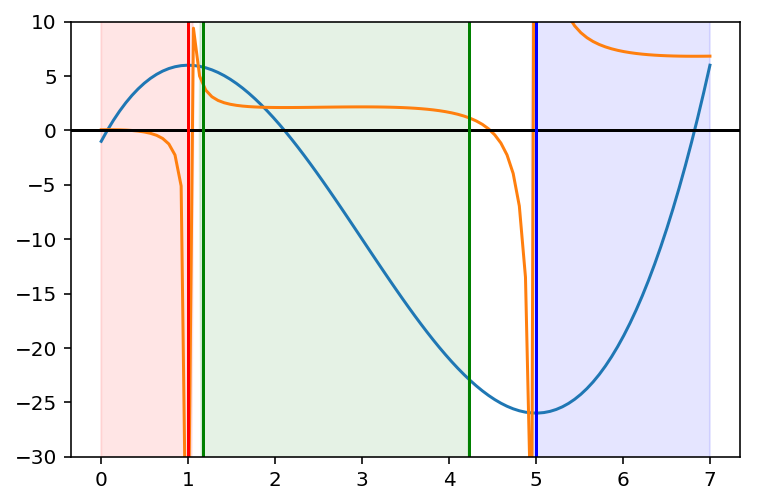

In [21]:
x = np.linspace(0,7,num=100)
y = P(x)


plt.plot(x,y,x,g(x))
plt.axhline(0,c="black")

# I1
plt.fill_between(x,99*(x < a),-99*(x < a),color="red",alpha=.1)
plt.axvline(a,c="red")

# I2
plt.fill_between(x,99*(x < omega2right)*(x > omega2left),-99*(x < omega2right)*(x > omega2left),color="green",alpha=.1)
plt.axvline(omega2left,c="green")
plt.axvline(omega2right,c="green")

# I3
plt.fill_between(x,99*(x > b),-99*(x > b),color="blue",alpha=.1)
plt.axvline(b,c="blue")

plt.ylim(-30,10)
plt.show()

---------
**g):** 

$$g: t \mapsto t - \frac{f(t)}{f'(t)}$$

Since $g$ is continuously differentiable and $g'$ has no roots on $L$, $g$ is strictly monotone. (If not, $g'$ would have a root on $L$ by the intermediate value theorem.) The same argument holds with $R$.

$g$ is continuous and $L$ is an interval, so $g(L)$ must be an interval.

$P$ is bounded on $\overline{L}$.
$P'$ is negative on $L$ and $\lim_{x \rightarrow a+} P'(x) = 0$.
Therefore, looking at the definition of $g$, we find:

$\lim_{x \rightarrow a+} g(x) = \infty$.

For a lower limit of $g(L)$, notice that $g$ is strictly decreasing, so:
$$\inf g(L) = \lim_{x \rightarrow \omega_2^- -} g(x) = g(\omega_2^-) = \omega_2^+$$
since $\omega_2^-$ is a fixed point of $g$.

Therefore,

$$g(L) = (\omega_2^+, \infty).$$

(The interval is open since $g$ is continuous and strictly monotone/)

Similarly, one finds:

$$g(R) = (-\infty, \omega_2^-).$$

------------------
**h):** Suppose $t_0 = a_k$ for some $k \geq 0$. Then
$$t_1 = g(t_0) = g(a_k) = b_{k-1}$$
$$t_2 = g(t_1) = g(b_{k-1}) = a_{k-2}$$

until eventually:

(if $k$ is even:)
$$t_{k-1} = b_1 = b$$
$$t_k = g(t_{k-1}) = g(b)$$
(if $k$ is odd:)
$$t_{k-1} = a_1 = a$$
$$t_k = g(t_{k-1}) = g(a)$$
which is not defined: Newton's methods will terminate.

Swap 'a' and 'b' in the above discussion to find that $t_0=b_k$ does not terminate for any $k \geq 0$.

-------------
**i):** Suppose $y \in \mathbb{R}$. Then for each $x \in \mathbb{R}$:

$$y=g(x)=x-\frac{P(x)}{P'(x)}\text{ iff}$$
$$0 = P(x) + (y - x) P'(x).$$

Since $\deg P = 3$, $\deg P' = 2$ and $\deg (x \mapsto y - x) = 1$, we find that
$$Q: x \mapsto P(x) + (y - x) P'(x).$$
is a third-degree polynomial and $g(x)=y$ is equivalent to $Q(x)=0$.

$g(a_2)=b_1$ so $a_2$ is a root of $x \mapsto P(x) + (b_1 - x) P'(x)$.

$g(b_2)=a_1$ so $b_2$ is a root of $x \mapsto P(x) + (a_1 - x) P'(x)$.

$g(a_3)=b_2$ so $a_3$ is a root of $x \mapsto P(x) + (b_2 - x) P'(x)$.

$g(b_3)=a_2$ so $b_3$ is a root of $x \mapsto P(x) + (a_2 - x) P'(x)$.

For each $y \in \mathbb{R}$, the function 

$$Q: x \mapsto P(x) + (y - x) P'(x)$$

has derivative:

$$Q': x \mapsto P'(x) - P'(x) + (y-x)P''(x) = (y-x)P''(x).$$

In [22]:
def find_Qy_root(y):
    Q  = lambda x: P(x) + (y-x)*Pd(x)
    Qd = lambda x: (y-x)*Pdd(x)
    root, converged = find_root_newton(Q, Qd, 0, verbose=False)
    if not converged:
        print("panic!")
    return root

a1=a
b1=b
a2 = find_Qy_root(b1)
b2 = find_Qy_root(a1)
a3 = find_Qy_root(b2)
b3 = find_Qy_root(a2)

print("a:",a1,a2,a3)
print("b:",b1,b2,b3)

a: 0.9999999999999937 1.1313780923215186 1.162952031832259
b: 5.000000000000003 4.279018786166596 4.239595022330189


------------------
**j):** To visualize the behaviour of $g$, the following plot might be useful

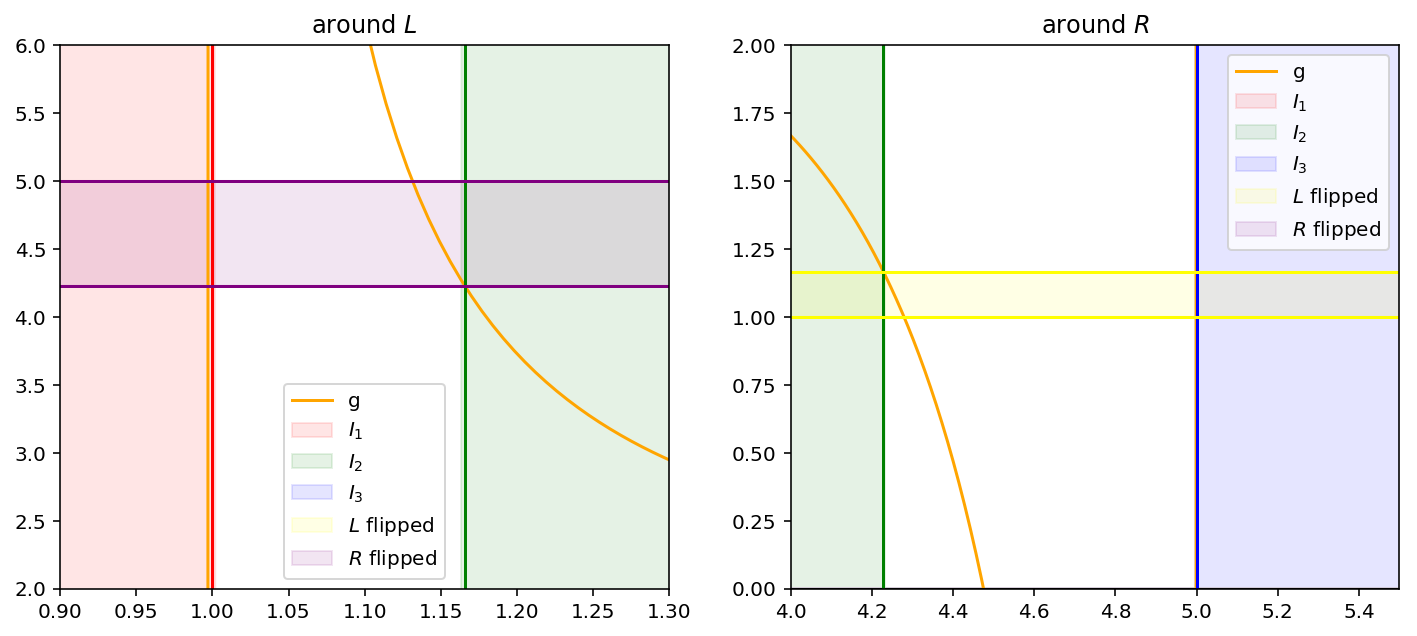

In [23]:
# Code to generate two plots, not required by the exercise.

x = np.linspace(0,7,num=1000)

fig,axes=plt.subplots(1,2)

fig.set_size_inches(12,5)
for i, prop in enumerate([{'xlim': [.9,1.3], 'ylim': [2,6], 'title': "around $L$"},{'xlim': [4,5.5], 'ylim': [0,2], 'title':"around $R$"}]):
    ax = axes[i]
    
    ax.plot(x,g(x),label="g",color="orange")
    ax.axhline(0,c="black")

    # I1
    ax.fill_between(x,99*(x < a),-99*(x < a),color="red",alpha=.1,label="$I_1$")
    ax.axvline(a,c="red")

    # I2
    ax.fill_between(x,99*(x < omega2right)*(x > omega2left),-99*(x < omega2right)*(x > omega2left),color="green",alpha=.1,label="$I_2$")
    ax.axvline(omega2left,c="green")
    ax.axvline(omega2right,c="green")

    # I3
    ax.fill_between(x,99*(x > b),-99*(x > b),color="blue",alpha=.1,label="$I_3$")
    ax.axvline(b,c="blue")

    # L
    ax.axhline(a,color="yellow")
    ax.axhline(omega2left,color="yellow")
    ax.fill_between(x,a,omega2left,color="yellow",alpha=.1,label="$L$ flipped")

    # R
    ax.axhline(b,color="purple")
    ax.axhline(omega2right,color="purple")
    ax.fill_between(x,omega2right,b,color="purple",alpha=.1,label="$R$ flipped")



    ax.legend()

    ax.set_xlim(prop["xlim"])
    ax.set_ylim(prop["ylim"])
    
    ax.set_title(prop["title"])
plt.show()

The previous plot contains two zoomed-in sections of $g$ (around $L$ and $R$). The areas $L$ and $R$ are shown horizontally. We see that a small portion of $L$ is mapped to the entire set $R$, and vice versa. 

Since $g$ is continuous and strictly monotone, we find that for each $j > 1$:

$$g(L_j) = g((a_j, a_{j+1})) = (g(a_j), g(a_{j+1})) = (b_{j-1}, b_j) = R_{j-1}$$
$$g(R_j) = g((b_j, b_{j+1})) = (g(b_j), g(b_{j+1})) = (a_{j-1}, a_j) = L_{j-1}$$

For $j=1$ we need to be more careful (as $g(a_1)$ is undefined), but the same idea applies:

$$g(L_1) = g((a_1, a_2)) = \lim_{x \rightarrow a_1 +} g((x, a_2)) = \lim_{x \rightarrow a_1 +} (g(x), g(a_2)) = (\infty,b_1) = (b,\infty)=I_3$$

since $g((x, a_2)) = (g(x), g(a_2))$ for each $a_1 < x < \omega_2^-$. Similarly,

$$g(R_1) = g((b_1, b_2)) = \lim_{x \rightarrow b_1 -} g((x, b_2)) = \lim_{x \rightarrow b_1 -} (g(x), g(b_2)) = (-\infty,a_1) = (-\infty,a)=I_1.$$

-------------
**k):** From the previous excercise, it follows that if $t_0 \in L_1$, then $\lim_{n\rightarrow \infty} g^{n}(t_0) = \omega_3$ ($g^n$ is '$g$ applied $n$ times') and if $t_0 \in R_1$, then $\lim_{n\rightarrow \infty} g^{n}(t_0) = \omega_1$.

We also see that if $n$ is even:

$$g^m(L_n)=g^{m-1}(R_{n-1})=\dots=g^{m-n}(I_1)$$
$$g^m(R_n)=g^{m-1}(L_{n-1})=\dots=g^{m-n}(I_3)$$

if $n$ is odd:

$$g^m(L_n)=g^{m-1}(R_{n-1})=\dots=g^{m-n}(I_3)$$
$$g^m(R_n)=g^{m-1}(L_{n-1})=\dots=g^{m-n}(I_1)$$

for any $m>n$.

Therefore:

$\mathcal{D}(\omega_1) = I_1 \cup \{L_n \, \mid \, n\text{ is even} \} \cup \{R_n \, \mid \, n\text{ is odd} \}$

$\mathcal{D}(\omega_2) = I_2$

$\mathcal{D}(\omega_3) = I_3 \cup \{L_n \, \mid \, n\text{ is odd} \} \cup \{R_n \, \mid \, n\text{ is even} \}$

which leaves the points $\{a_j \, \mid \, j \geq 1\} \cup \{b_j \, \mid \, j \geq 1\}$, on which Newton's method terminates before converging.

----------------
----------------
# 2. Dimensions of a cuboid

**a):** We need to solve $F(u)=0$, where $F$ is defined as:

$F: \mathbb{R}^3 \rightarrow \mathbb{R}^3$

$F: (x,y,z)^T \mapsto (xyz, \quad xy + xz + yz, \quad x+y+z)^T - (V, A/2, L/4)^T$

and $F': \mathbb{R}^3 \rightarrow \mathbb{R}^3$ is the Jacobian.


At each step $k$ of Newton's method, the linear equation $F'(u_k)v_k = -F(u_k)$ needs to be solved. (Which is linear because $F'(u_k)$ is the Jacobian _matrix_.) The solution $v_k$ is then used to compute $u_{k+1} = u_k + v_k$.

Newton's method terminates at the first step if the previous linear system (with $k=0$) has no solution. If there is no solution, then $\det F'(u_0) = 0$. (The converse is not true in general (I think).)

--------------
**b):** 

In [24]:
def find_root_newton_multidim(Func, Funcderiv, u_zero, tolerance=1e-12, max_iter=100, verbose=True):
    """
    Apply Newton's method to the given multidimensional function.
    
    Parameters
    ----------
    
    Func
        Function to apply the algorithm to
    
    Funcderiv
        Exact Jacobian of the function
    
    t_zero : array_like
        Initial value
    
    tolerance : float
        Tolerance for the absolute value of `func`
    
    max_iter : int
        Maximum number of iterations
    
    verbose : bool
        Print progress at each iteration?
    
    Returns
    -------
    array_like
        The found root
    
    bool
        A boolean indicating whether the algorithm converged
    """
    iteration = 0
    u = u_zero
    
    # We increase efficiency by only evaluating `F(u)` once per iteration:
    Funcu = Func(u)
    
    norm_squared = lambda v: v.dot(v.T)
    
    while norm_squared(Funcu) > tolerance*tolerance and iteration < max_iter:
        # Print progress:
        if verbose:
            print(f"k={iteration}, u_k={u},\t ||Func(u_k)||_2={np.sqrt(norm_squared(Funcu))}")
        
        # Compute v_k:
        try:
            v = np.linalg.solve(Funcderiv(u),-Funcu)
        except np.linalg.LinAlgError as err:
            if verbose:
                print("Jacobian is singular; algorithm terminating...")
            return np.nan, False
        
        u = u + v
        iteration += 1
        Funcu = Func(u)
    
    return u, iteration!=max_iter

------------
**c):**

In [25]:
def F(u,V,A,L):
    x,y,z=u
    return np.array([x*y*z,   x*y + x*z + y*z,   x+y+z]) - np.array([V, A/2, L/4])


def Fd(u,V,A,L):
    x,y,z=u
    return np.array([[y*z, x*z, x*y],
                     [y+z, x+z, x+y],
                     [1,   1,   1]])

V = 1
A = 30
L = 36

for initial_value in [np.array([0,0,1]),
                      np.array([5,5,5]),
                      np.array([1,2,3]),
                      np.array([1,1e10,1e20]),
                      np.array([-1,2,-3])]:
    print(f"initial value: {initial_value}")
    print("-"*20)
    root, converged = find_root_newton_multidim(Func=lambda u: F(u, V, A, L),
                                                Funcderiv=lambda u: Fd(u, V, A, L),
                                                u_zero=initial_value)
    print(f"Converged: {converged}, root: {root}")
    print("="*20)
    print()
    print()

initial value: [0 0 1]
--------------------
k=0, u_k=[0 0 1],	 ||Func(u_k)||_2=17.029386365926403
Jacobian is singular; algorithm terminating...
Converged: False, root: nan


initial value: [5 5 5]
--------------------
k=0, u_k=[5 5 5],	 ||Func(u_k)||_2=137.88400922514546
Jacobian is singular; algorithm terminating...
Converged: False, root: nan


initial value: [1 2 3]
--------------------
k=0, u_k=[1 2 3],	 ||Func(u_k)||_2=7.0710678118654755
k=1, u_k=[-2.  3.  8.],	 ||Func(u_k)||_2=50.69516742254627
k=2, u_k=[-0.5  2.6  6.9],	 ||Func(u_k)||_2=10.132966002114076
k=3, u_k=[-0.02593723  2.20510128  6.82083595],	 ||Func(u_k)||_2=1.4035114622392373
k=4, u_k=[0.06539453 2.11153998 6.82306549],	 ||Func(u_k)||_2=0.05847790413720175
k=5, u_k=[0.06953785 2.107412   6.82305015],	 ||Func(u_k)||_2=0.0001180734666987662
k=6, u_k=[0.06954625 2.1074036  6.82305015],	 ||Func(u_k)||_2=4.870055144576335e-10
Converged: True, root: [0.06954625 2.1074036  6.82305015]


initial value: [1.e+00 1.e+10 1.e+20

We can identify a number of patterns. Let's call our initial value $(x,y,z)$.

* If at least two of $x,y,z$ are zero, then the first row of the jacobian is $(0,0,0)$, and the matrix is singular (i.e. no convergence).
 * The set of initial values where the algorithm does not converge, is _not_ a linear subspace of $\mathbb{R}^3$. (Otherwise the algorithm would converge nowhere, as each element of the standard basis of $\mathbb{R}^3$ has two zero entries.)
* If $x=y=z$, then the second row of the jacobian is $(2x,2x,2x)$, a multiple of the third row, making it singular.

It seems like there are 6 unique roots, one per permutation of x,y,z coordinates:

In [26]:
for perm in permutations([1,2,3]):
    initial_value = np.array(perm)
    print(f"initial value: {initial_value}")
    print("-"*20)
    root, converged = find_root_newton_multidim(Func=lambda u: F(u, V, A, L),
                                                Funcderiv=lambda u: Fd(u, V, A, L),
                                                u_zero=initial_value,
                                                verbose=False)
    print(f"Converged: {converged}, root: {root}")
    print("="*20)
    print()
    print()

initial value: [1 2 3]
--------------------
Converged: True, root: [0.06954625 2.1074036  6.82305015]


initial value: [1 3 2]
--------------------
Converged: True, root: [0.06954625 6.82305015 2.1074036 ]


initial value: [2 1 3]
--------------------
Converged: True, root: [2.1074036  0.06954625 6.82305015]


initial value: [2 3 1]
--------------------
Converged: True, root: [2.1074036  6.82305015 0.06954625]


initial value: [3 1 2]
--------------------
Converged: True, root: [6.82305015 0.06954625 2.1074036 ]


initial value: [3 2 1]
--------------------
Converged: True, root: [6.82305015 2.1074036  0.06954625]




Let's pick one, and compare the results with the previous algorithm:

In [27]:
#%%timeit # Uncomment to measure performance
initial_value = np.array([1,2,3])
root, converged = find_root_newton_multidim(Func=lambda u: F(u, V, A, L),
                                            Funcderiv=lambda u: Fd(u, V, A, L),
                                            u_zero=initial_value,
                                            verbose=False)
roots_multidim_method = sorted(list(root))

In [28]:
#%%timeit # Uncomment to measure performance
initial_values = [0,2,6]
#initial_values = np.linspace(0,L/4,num=10)
roots = find_many_roots(P, Pd, initial_values=initial_values)
roots_old_method = sorted(list(roots))

In [29]:
print("New method: ", roots_multidim_method)
print("Old method: ", roots_old_method)

New method:  [0.06954625036208663, 2.1074035956216335, 6.823050154016279]
Old method:  [0.06954625036208663, 2.107403595621634, 6.82305015401628]


The results are very similar, as expected. Using IPython's `%%timeit`, we can measure the performance of both methods. This is not a fair comparison, however, as the performance of both methods depend on the choice of initial values. However:

* The old method is about **10x faster** when 3 initial values are chosen close to the analytic roots.
* Results are **similar** when the old method is used with 10 evenly spaced initial values between $0$ and $L/4$ (theoretical upper bound).

-----------------
-----------------
# 3. A strengthened cuboid

**a):** The same algorithm can be applied to this problem, using:

In [31]:
def H(u,V,A,L):
    x,y,z=u
    return np.array([x*y*z,   
                     x*y + x*z + y*z,   
                     x+y+z + np.sqrt(x*x + y*y) + np.sqrt(x*x + z*z) + np.sqrt(z*z + y*y)]) - np.array([V, A/2, L/4])


def Hd(u,V,A,L):
    x,y,z=u
    return np.array([[y*z, x*z, x*y],
                     [y+z, x+z, x+y],
                     [1 + x/np.sqrt(x*x + y*y) + x/np.sqrt(x*x + z*z),
                      1 + y/np.sqrt(x*x + y*y) + y/np.sqrt(y*y + z*z),
                      1 + z/np.sqrt(z*z + y*y) + z/np.sqrt(x*x + z*z)]])

Note that for each $w \in \mathbb{R}$, the derivative of $t \mapsto \sqrt{t^2 + w^2}$ is:

$$t \mapsto \frac{2t}{2\sqrt{t^2 + w^2}} = \frac{t}{\sqrt{t^2 + w^2}}$$

In [36]:
V = 100
A = 150
L = 160

for initial_value in [np.array([0,0,1]),
                      np.array([5,5,5]),
                      np.array([10,20,30]),
                      np.array([30,20,10]),
                      np.array([1,2,3]),
                      np.array([1,2,3]),
                      np.array([1,1e10,1e20]),
                      np.array([-1,2,-3])]:
    print(f"initial value: {initial_value}")
    print("-"*20)
    root, converged = find_root_newton_multidim(Func=lambda u: H(u, V, A, L),
                                                Funcderiv=lambda u: Hd(u, V, A, L),
                                                u_zero=initial_value,
                                                verbose=False) ############################# <---
    print(f"Converged: {converged}, root: {root}")
    print("="*20)
    print()
    print()

initial value: [0 0 1]
--------------------
Converged: False, root: nan


initial value: [5 5 5]
--------------------
Converged: False, root: nan


initial value: [10 20 30]
--------------------
Converged: True, root: [8.15688076 2.25493505 5.43678113]


initial value: [30 20 10]
--------------------
Converged: True, root: [5.43678113 2.25493505 8.15688076]


initial value: [1 2 3]
--------------------
Converged: True, root: [-38.85699386  -2.88761807   0.89123257]


initial value: [1 2 3]
--------------------
Converged: True, root: [-38.85699386  -2.88761807   0.89123257]


initial value: [1.e+00 1.e+10 1.e+20]
--------------------
Converged: True, root: [  0.89123257  -2.88761807 -38.85699386]


initial value: [-1  2 -3]
--------------------
Converged: False, root: [ 1.12290012e+15  8.17013843e+15 -6.71313816e+15]




c:\users\fonsv\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
c:\users\fonsv\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


it seems like the initial value $(10, 20, 30)^T$ is giving a good result:

In [40]:
root, converged = find_root_newton_multidim(Func=lambda u: H(u, V, A, L),
                                                Funcderiv=lambda u: Hd(u, V, A, L),
                                                u_zero=np.array([10,20,30]),
                                                verbose=False)
print(f"Solution: {root}")

Solution: [8.15688076 2.25493505 5.43678113]


In [ ]:
print("🐷"*1000)